<a href="https://colab.research.google.com/github/MAristyaP/Mesin_Learning2023/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('/content/insurance.csv')

In [3]:
data.head()
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


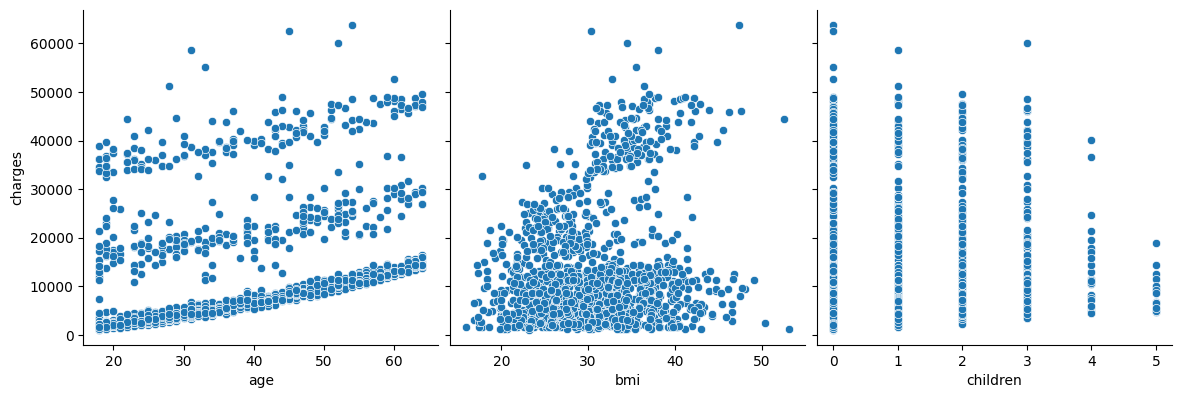

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the data using pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

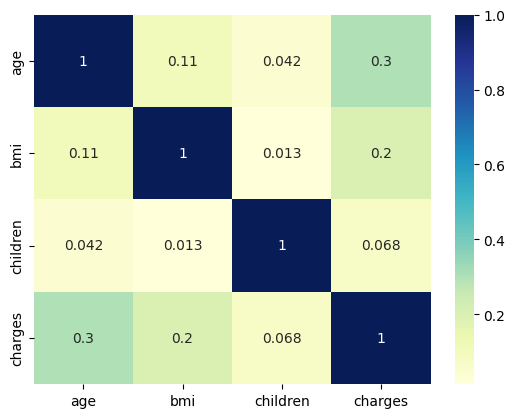

In [5]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)

In [6]:
X = data[['age', 'bmi', 'children']]
y = data['charges']

2. plit the dataset into training (train) and testing (test) data with an appropriate proportion.


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

3. Perform feature scaling if necessary. I useStandardization (z-score scaling) to scale the features.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4.  Create a multiple linear regression model using Scikit-Learn.

In [9]:
linear_regression_model = LinearRegression()

In [10]:
svr_model = SVR(kernel='linear', C=1000)
svr_model.fit(X_train, y_train)

SVR(C=1000, kernel='linear')

5. Train the model on the training data and make predictions on the testing data.

In [11]:
linear_regression_model.fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

5. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.

In [12]:
linear_r2 = r2_score(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)

svr_r2 = r2_score(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)

print("Linear Regression - R-squared:", linear_r2)
print("Linear Regression - MSE:", linear_mse)
print("Linear Regression - MAE:", linear_mae)

print("Support Vector Regression - R-squared:", svr_r2)
print("Support Vector Regression - MSE:", svr_mse)
print("Support Vector Regression - MAE:", svr_mae)

Linear Regression - R-squared: 0.11011288902870364
Linear Regression - MSE: 129209552.77458598
Linear Regression - MAE: 8899.594165897634
Support Vector Regression - R-squared: -0.18523154214348447
Support Vector Regression - MSE: 172092881.9022216
Support Vector Regression - MAE: 6762.11535567421
